In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025, random_state=50),
    SVC(gamma=2, C=1, random_state=50),
    DecisionTreeClassifier(max_depth=5, random_state=50),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=50
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=50),
    AdaBoostClassifier(algorithm="SAMME", random_state=50),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [3]:
# Import data.csv and labels.csv as pandas DataFrames
data = pd.read_csv("data_noise_D_01.csv")
labels = pd.read_csv("labels.csv")

# Convert DataFrames to numpy arrays
data = data.values
labels = labels.values

# Only use X values
data = data[:, 2:]

# Shuffle the data and labels, split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.25, random_state=50, shuffle=True
)

y_train = y_train.ravel()
y_test = y_test.ravel()

In [4]:
# Train all classifiers using data and labels
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(score)

Nearest Neighbors
0.58992
Linear SVM
0.49616
RBF SVM
0.49704
Decision Tree
0.53096
Random Forest
0.5656
Neural Net
0.76216
AdaBoost
0.5584
Naive Bayes
0.64872
QDA
0.77528


c:\Users\German\.julia\conda\3\x86_64\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [5]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
importances = clf.feature_importances_
print(importances)

[0.         0.01583716 0.01734961 0.01844005 0.0165592  0.01854981
 0.01751732 0.01715292 0.01784734 0.01789567 0.01721312 0.01711058
 0.0173303  0.01740144 0.01692196 0.01704778 0.01636876 0.01764718
 0.01642552 0.01616815 0.01626453 0.01663879 0.01698194 0.01657388
 0.01662475 0.01742786 0.01626936 0.01653334 0.01639071 0.01686321
 0.01647584 0.01736677 0.01606378 0.01656435 0.01681239 0.01725763
 0.01687293 0.01707104 0.0171861  0.01756912 0.01780918 0.01669166
 0.01715396 0.01715476 0.01734339 0.01708898 0.01662331 0.01692609
 0.01754571 0.01653879 0.01672038 0.01705372 0.01692518 0.01648688
 0.01666878 0.01700959 0.01615557 0.01597197 0.01692381 0.01661611]


In [6]:
from sklearn.inspection import permutation_importance

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=0)
importance = result.importances_mean

print(importance)

c:\Users\German\.julia\conda\3\x86_64\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[0.         0.00658684 0.00655751 0.00687485 0.00673085 0.00660018
 0.00904557 0.0087709  0.00812288 0.00701619 0.00820555 0.0087149
 0.00754953 0.00674151 0.00739486 0.00692818 0.00630683 0.00692285
 0.0061895  0.00664018 0.00636017 0.0064135  0.00703485 0.0060695
 0.00658684 0.00720019 0.00703752 0.00721886 0.00595483 0.00715486
 0.00704285 0.00760554 0.00588816 0.00708286 0.00856023 0.00630417
 0.00658684 0.00592549 0.00648817 0.00680551 0.0060775  0.00672018
 0.00719753 0.00664284 0.00629083 0.0063015  0.00502947 0.00652551
 0.00533614 0.00542148 0.00528547 0.00387744 0.00490413 0.00434145
 0.00466946 0.00460546 0.00421345 0.00433612 0.00293875 0.00533348]


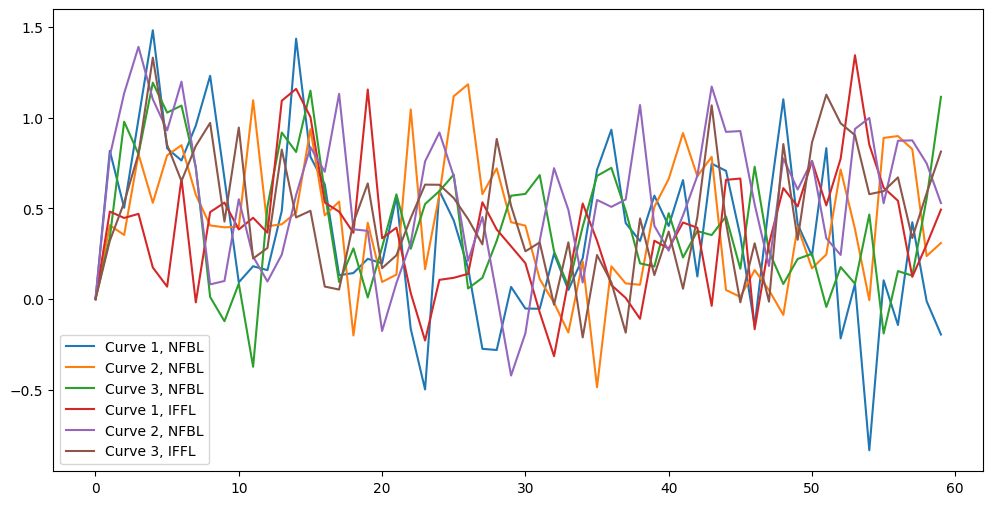

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data[0], label="Curve 1, NFBL")
plt.plot(data[10000], label="Curve 2, NFBL")
plt.plot(data[20000], label="Curve 3, NFBL")
plt.plot(data[25000], label="Curve 1, IFFL")
plt.plot(data[35000], label="Curve 2, NFBL")
plt.plot(data[45000], label="Curve 3, IFFL")

plt.legend()